# Import Packages

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Pt1. Meet the data

##### Load Raw data 

This data includes four columns/random variables: 
    
* The daily ETF 
* The daily relative change in the price of the crude oil
* The daily relative change in the gold price
* The daily return of the JPMorgan Chase & Co stock. 

The sample size is 1000. 

In [17]:
data_df = pd.read_csv('./MA 541 Course Project Data.csv')

print(data_df.shape)
data_df.head()

(1000, 4)


,Close_ETF,oil,gold,JPM
0,97.349998,0.039242,0.004668,0.032258
1,97.750000,0.001953,-0.001366,-0.002948
2,99.160004,-0.031514,-0.007937,0.025724
3,99.650002,0.034552,0.014621,0.011819
4,99.260002,0.013619,-0.011419,0.000855


In [75]:
# data_df.describe()

In [71]:
# Random Variables

etf_mu = np.mean(data_df.iloc[:,0])
oil_mu = np.mean(data_df.iloc[:,1])
gold_mu = np.mean(data_df.iloc[:,2])
jpm_mu = np.mean(data_df.iloc[:,3])

etf_std = np.std(data_df.iloc[:,0])
oil_std = np.std(data_df.iloc[:,1])
gold_std = np.std(data_df.iloc[:,2])
jpm_std = np.std(data_df.iloc[:,3])

print('Mean ETF: ', etf_mu)
print('Mean Oil: ', oil_mu)
print('Mean Gold: ', gold_mu)
print('Mean JPM: ', jpm_mu)
# print('\n')
print('Standard deviation of ETF: ', etf_std)
print('Standard deviation of Oil: ', oil_std)
print('Standard deviation of Gold: ', gold_std)
print('Standard deviation of JPM: ', jpm_std)

Mean ETF:  121.1529600120001
Mean Oil:  0.0010300354900000003
Mean Gold:  0.0006628360819999998
Mean JPM:  0.0005304110210000002
Standard deviation of ETF:  12.563503845944297
Standard deviation of Oil:  0.02108234945944757
Standard deviation of Gold:  0.011283414317347945
Standard deviation of JPM:  0.011011052723643009


In [74]:
data_df_correlation = data_df.corr('pearson')
display('Correlation matrix of Data:',data_df_correlation)

'Correlation matrix of Data:'

,Close_ETF,oil,gold,JPM
Close_ETF,1.000000,-0.009045,0.022996,0.036807
oil,-0.009045,1.000000,0.235650,-0.120849
gold,0.022996,0.235650,1.000000,0.100170
JPM,0.036807,-0.120849,0.100170,1.000000


# Pt2. Describe the data

##### Exploratory Data Analysis

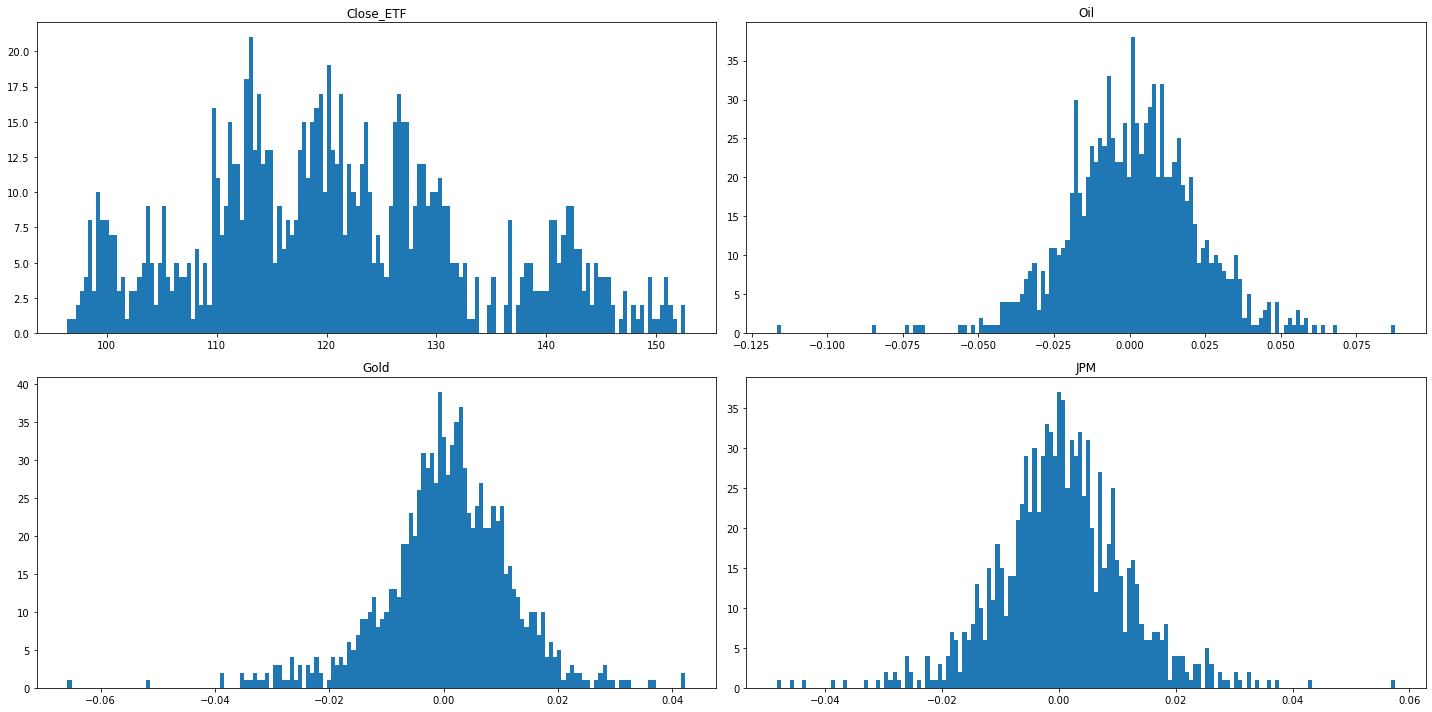

In [220]:
# Distribution plot with histogram

fig,ax = plt.subplots(2,2,figsize=(20, 10))
    
ax[0,0].hist(data_df.iloc[:,0],bins=150);
ax[0,1].hist(data_df.iloc[:,1],bins=150);
ax[1,0].hist(data_df.iloc[:,2],bins=150);
ax[1,1].hist(data_df.iloc[:,3],bins=150);

ax[0,0].title.set_text('Close_ETF')
ax[0,1].title.set_text('Oil')
ax[1,0].title.set_text('Gold')
ax[1,1].title.set_text('JPM')

fig.tight_layout()
plt.show()

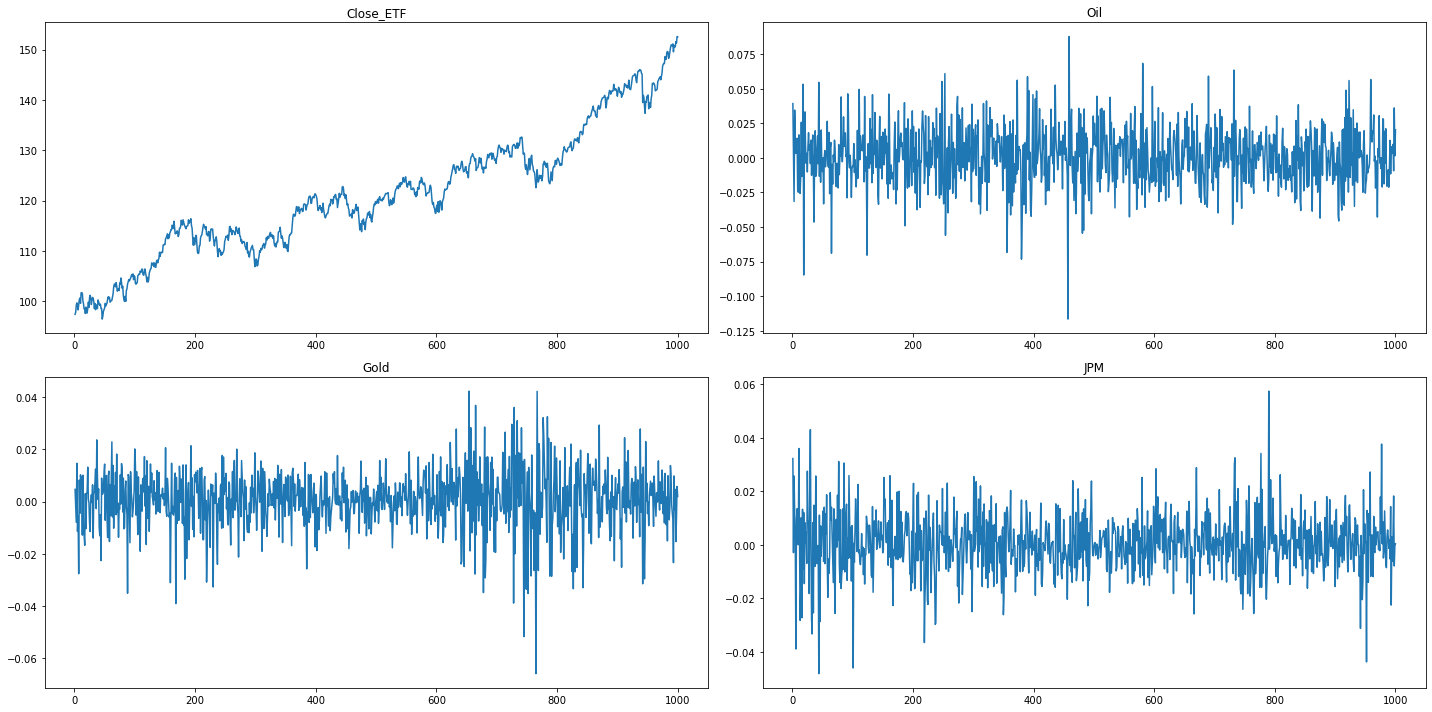

In [219]:
# Time series plot

t = np.arange(1000)+1
fig,ax = plt.subplots(2,2,figsize=(20, 10))

ax[0,0].plot(t,data_df.iloc[:,0]);
ax[0,1].plot(t,data_df.iloc[:,1]);
ax[1,0].plot(t,data_df.iloc[:,2]);
ax[1,1].plot(t,data_df.iloc[:,3]);

ax[0,0].title.set_text('Close_ETF')
ax[0,1].title.set_text('Oil')
ax[1,0].title.set_text('Gold')
ax[1,1].title.set_text('JPM')

fig.tight_layout()
plt.show()

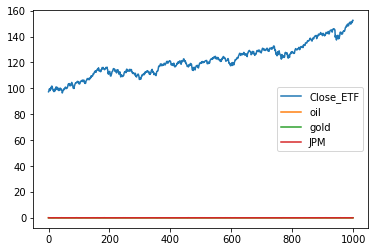

In [117]:
# ax = plt.gca();
# ax.set_ylim([-10, 165])
# ax.plot(t,data_df)
data_df.plot();

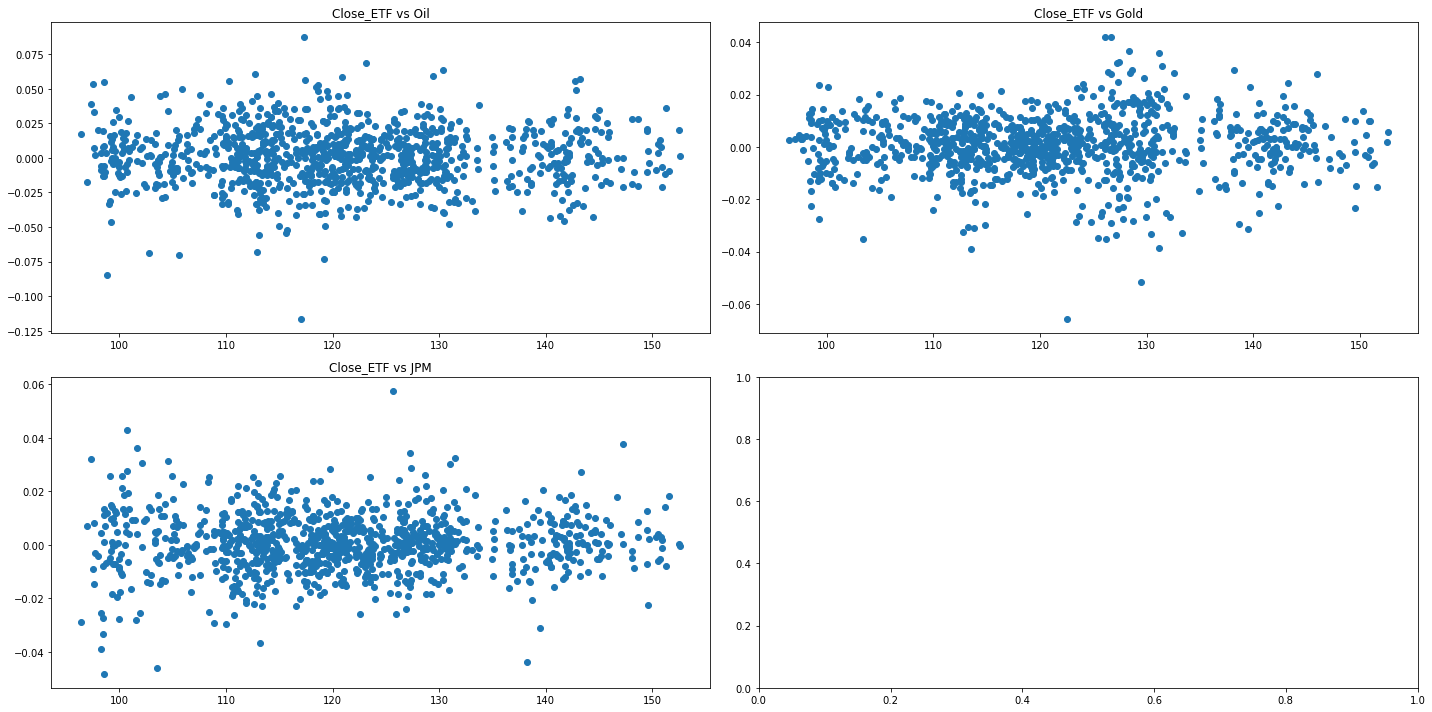

In [218]:
# Scatter plot

fig,ax = plt.subplots(2,2,figsize=(20, 10))

ax[0,0].scatter(data_df.iloc[:,0],data_df.iloc[:,1]);
ax[0,1].scatter(data_df.iloc[:,0],data_df.iloc[:,2]);
ax[1,0].scatter(data_df.iloc[:,0],data_df.iloc[:,3]);


ax[0,0].title.set_text('Close_ETF vs Oil')
ax[0,1].title.set_text('Close_ETF vs Gold')
ax[1,0].title.set_text('Close_ETF vs JPM')

fig.tight_layout()
plt.show()

# Pt3. Distribution of the data

Hypothesis:
    
* ETF follows a Multimodal distribution based on the plots in Pt2.
* Oil follows a Normal distribution based on the plots in Pt2.
* Gold follows a Normal distribution based on the plots in Pt2.
* JPM follows a Normal distribution based on the plots in Pt2.

In [223]:
# st.norm.cdf(data_df.iloc[:,1])
N_pdf = lambda x,mu,sig: (1/(sig*np.sqrt(2*np.pi)))*np.exp(-((x-mu)**2/(2*sig**2)))

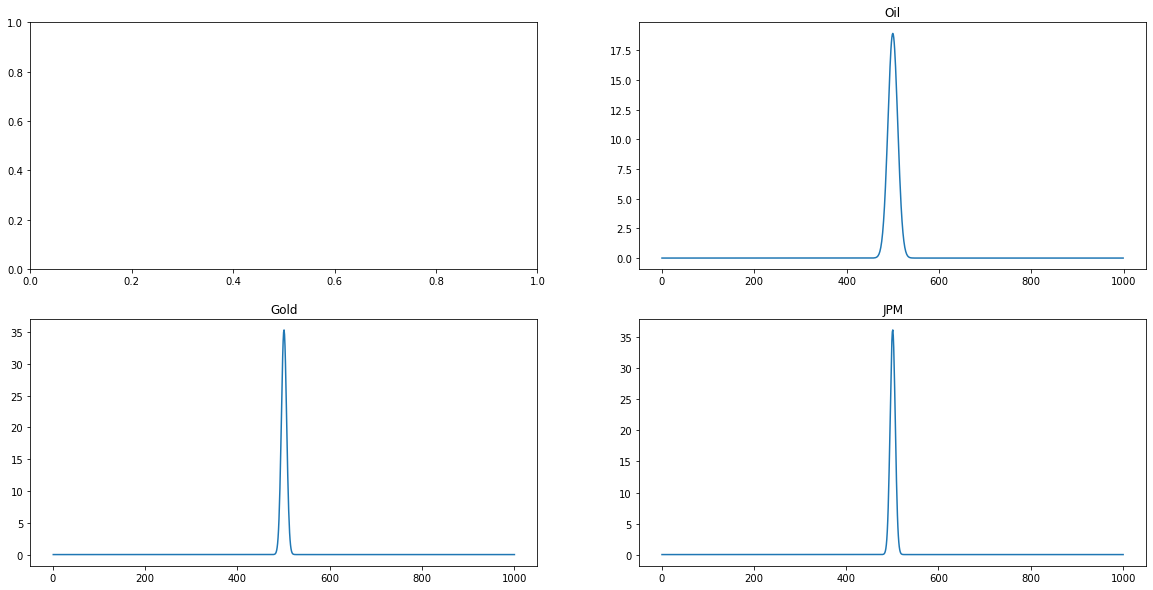

In [225]:
fig,ax = plt.subplots(2,2,figsize=(20, 10))

x = np.linspace(-1,1,1000)

# ax[0,0].plot(N_pdf(x,oil_mu,oil_std));
ax[0,1].plot(N_pdf(x,oil_mu,oil_std));
ax[1,0].plot(t,N_pdf(x,gold_mu,gold_std));
ax[1,1].plot(t,N_pdf(x,jpm_mu,jpm_std));

# ax[0,0].title.set_text('Close_ETF')
ax[0,1].title.set_text('Oil')
ax[1,0].title.set_text('Gold')
ax[1,1].title.set_text('JPM')

# Pt4. Importance of CLT